In [1]:
#imports
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import os
import feather
import datetime

from  ema_workbench.analysis  import prim
from ema_workbench import (load_results, ema_logging)
ema_logging.log_to_stderr(ema_logging.INFO)

from IPython.core import display as ICD
import mpld3
%matplotlib notebook

C:\Users\Patrick\Anaconda3\lib\site-packages\ema_workbench\em_framework\optimization.py:29: ImportWarning: platypus based optimization not available
  warnings.warn("platypus based optimization not available", ImportWarning)
C:\Users\Patrick\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


In [3]:
#load previously generated data with feather, and reshape to fit EMA expectations
#outcomes
x_path = r'C:\Users\Patrick\Documents\GitHub\BBSD\Brusselator\Data\2018-07-09y.feather'
df_ts = feather.read_dataframe(x_path)
nd_ts = df_ts.values
outcomes = {"x":nd_ts}

#experiments
expts_path = r'C:\Users\Patrick\Documents\GitHub\BBSD\Brusselator\Data\2018-07-09Experiments.feather'
df_expts = feather.read_dataframe(expts_path)

experiments = np.empty([100,],dtype=[('b0', '<f8'), ('a', '<f8'), ('scenario_id', 'O'), ('policy', 'O'), ('model', 'O')])

for r in range(0,experiments.shape[0]):
    experiments[r]=(df_expts.iloc[r,0], df_expts.iloc[r,1], r, "None", "StrogatzBrusselator" )

#re-create results

results = (experiments,outcomes)

In [4]:
#test outcomes
outcomes["x"][1:5]

array([[0.5       , 0.55519712, 0.60592175, ..., 2.01248789, 2.01335907,
        2.01415491],
       [0.5       , 0.6200152 , 0.7122612 , ..., 3.17016602, 3.20285726,
        3.23552275],
       [0.5       , 0.64663815, 0.77000016, ..., 0.84190673, 0.89989281,
        0.98093122],
       [0.5       , 0.64638114, 0.78930497, ..., 1.54641449, 1.54641449,
        1.54641449]])

In [5]:
#test experiments
experiments[1:5]

array([(0.58703632, 1.17549461, 1, 'None', 'StrogatzBrusselator'),
       (0.3904563 , 2.45930358, 2, 'None', 'StrogatzBrusselator'),
       (0.92639141, 2.84947352, 3, 'None', 'StrogatzBrusselator'),
       (1.69672394, 2.6238401 , 4, 'None', 'StrogatzBrusselator')],
      dtype=[('b0', '<f8'), ('a', '<f8'), ('scenario_id', 'O'), ('policy', 'O'), ('model', 'O')])

In [7]:
#import clustering solutions from R via Feather
clsol_path = r'C:\Users\Patrick\Documents\GitHub\BBSD\Brusselator\Data\2018-07-09DWT_True.feather'
df_clsol = feather.read_dataframe(clsol_path)
df_clsol.head()

,DWT,truecl
0,1,1
1,1,1
2,2,2
3,1,2
4,1,1


In [10]:
#add binary column for PRIM
coloi = "DWT" #column of interest
df_clsol['bin'] = np.where(df_clsol[coloi]==1, 1, 0)
df_clsol.head()

,DWT,truecl,bin
0,1,1,1
1,1,1,1
2,2,2,0
3,1,2,1
4,1,1,1


[MainProcess/INFO] 100 points remaining, containing 34 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.27, coverage: 0.7941176470588235, density: 1.0 restricted_dimensions: 2


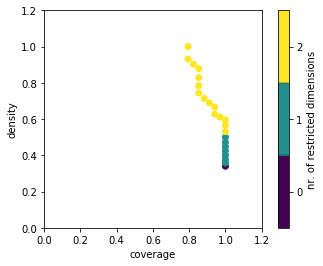

In [16]:
prim_alg = prim.Prim(experiments, np.where(df_clsol["DWT"]==2, 1, 0), threshold=0.8) #rotate through for DWT=1 or 2
box1 = prim_alg.find_box()

box1.show_tradeoff()
plt.show()

coverage    0.852941
density     0.878788
mass            0.33
mean        0.878788
res dim            2
Name: 19, dtype: object

      box 19                                   
         min       max                qp values
b0  0.212119  1.114433  [8.031601545316985e-06]
a   2.410354  4.987367  [0.0002975846392265083]



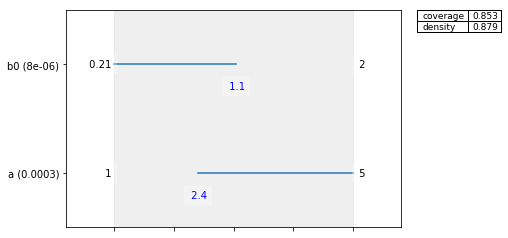

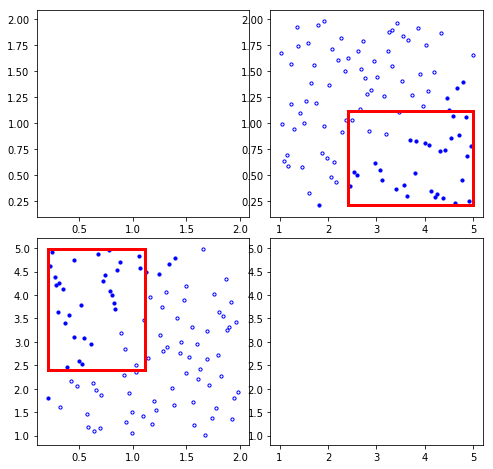

In [21]:
top_box = 19

box1.inspect(top_box)
box1.inspect(top_box, style='graph')

box1.select(top_box)
fig = box1.show_pairs_scatter()
fig.set_size_inches((8,8))
plt.show()
plt.close()